In [1]:
from alignments import TextAlignment
import dataset
import matplotlib.pyplot as plt
import numpy as np

/Users/lachlangray/dev/rep-eng/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
text_models = [
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-1B",
    "microsoft/phi-1_5",
]

## Plotting Utilities

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_square_matrix(matrix, labels, ax):
    """
    Plots a square matrix with labeled rows and columns on a given axis.

    Parameters:
    - matrix (2D array): A square matrix to plot.
    - labels (list of str): A list of labels for the rows and columns.
    - ax (matplotlib axis): Axis on which to plot the matrix.
    """
    # Check if the matrix is square and the labels match the size
    if len(matrix) != len(matrix[0]) or len(matrix) != len(labels):
        raise ValueError("Matrix must be square and the number of labels must match matrix dimensions.")
    
    cax = ax.matshow(matrix, vmin=0, vmax=1, cmap='viridis')

    # Set labels for ticks
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the x labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=90)

    plt.colorbar(cax, ax=ax)

def plot_matrix_grid(matrices_with_labels, subplot_titles, grid_shape):
    """
    Plots a grid of square matrices with labeled rows and columns.

    Parameters:
    - matrices_with_labels (list of tuples): Each tuple contains (matrix, labels).
    - grid_shape (tuple of int): Number of rows and columns for the grid (e.g., (2, 2)).
    - subplot_titles (list of str): Titles for each subplot. Should match the number of matrices.
    """
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(5 * grid_shape[1], 5 * grid_shape[0]))
    
    # Flatten the axes if grid_shape is greater than 1x1
    if grid_shape[0] > 1 and grid_shape[1] > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for idx, (matrix, labels) in enumerate(matrices_with_labels):
        if matrix is None:
            continue
        if idx >= len(axes):
            break
        plot_square_matrix(matrix, labels, axes[idx])
        
        # Add titles if provided
        if subplot_titles and idx < len(subplot_titles):
            axes[idx].set_title(subplot_titles[idx], pad=10)

    # Hide any unused subplots
    for ax in axes[len(matrices_with_labels):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()



## ARC


Set overlap between topk nearest questions to each question, topk nearest answers to each answer, and set overlap between topk chosen questions and topk chosen answers.

Starting meta-llama/Llama-3.2-1B-Instruct
Starting meta-llama/Llama-3.2-1B
Starting microsoft/phi-1_5
Starting meta-llama/Llama-3.2-1B-Instruct
Starting meta-llama/Llama-3.2-1B
Starting microsoft/phi-1_5


/Users/lachlangray/dev/rep-eng/alignments.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.encodings[model] = torch.load(cache_pth)


Starting meta-llama/Llama-3.2-1B-Instruct
Starting meta-llama/Llama-3.2-1B
Starting microsoft/phi-1_5
Starting meta-llama/Llama-3.2-1B-Instruct
Starting meta-llama/Llama-3.2-1B
Starting microsoft/phi-1_5


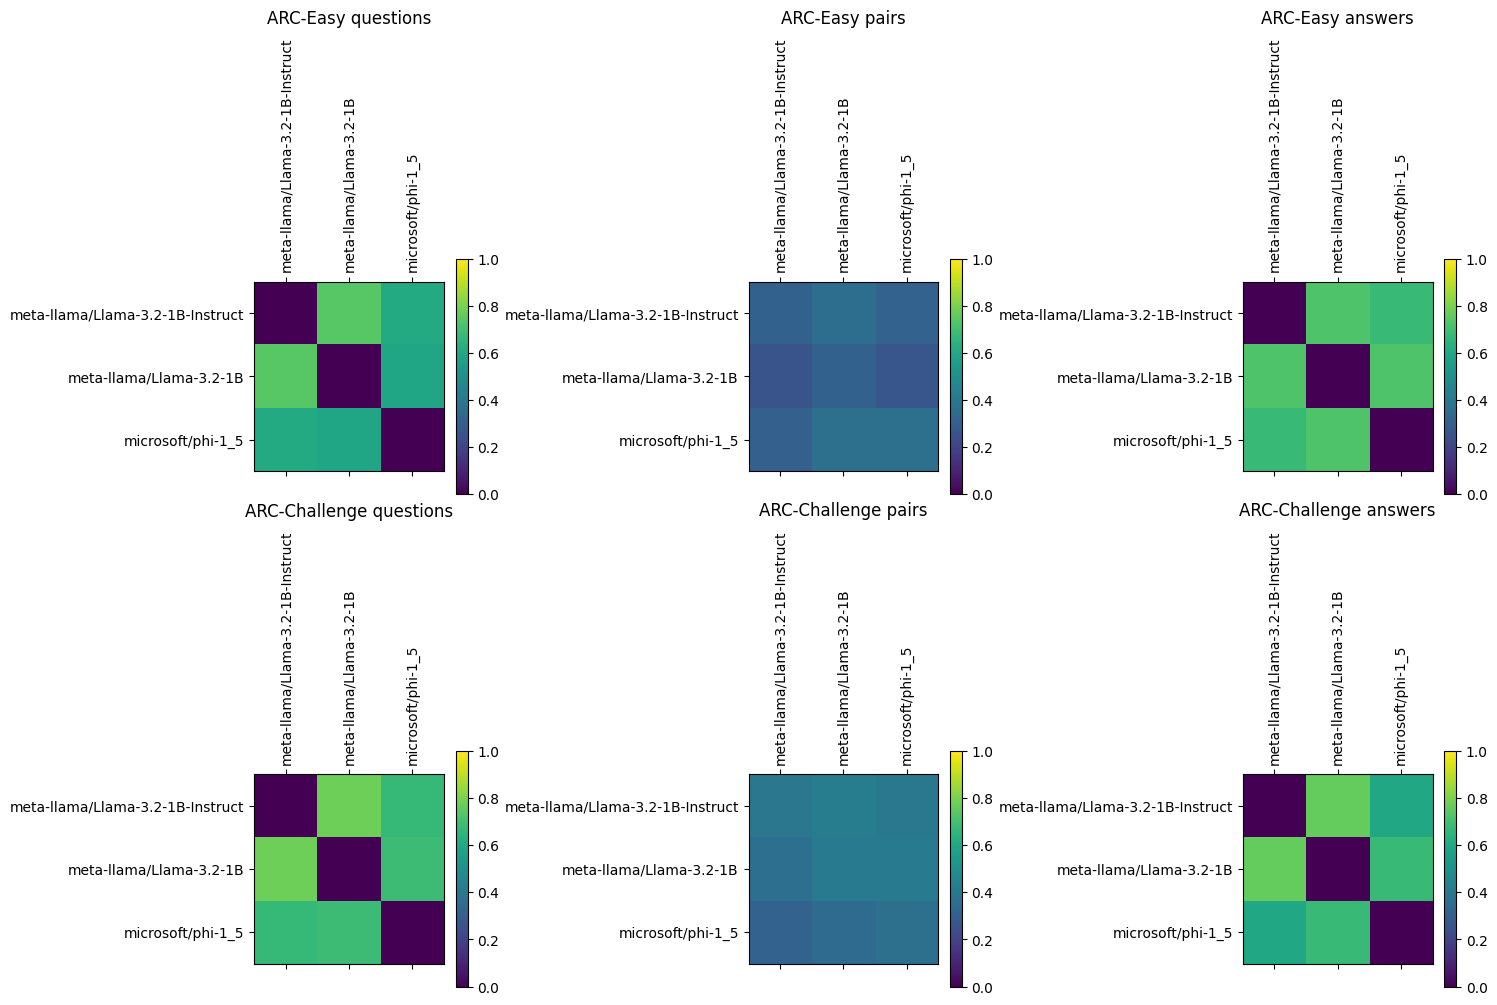

In [18]:
from dataset import get_arc

limit = 1024
topk = 5

q, a= get_arc("ARC-Easy", limit=limit)
easy_q = TextAlignment(text_models, q)
easy_a = TextAlignment(text_models, a)

q, a= get_arc("ARC-Challenge", limit=limit)
hard_q = TextAlignment(text_models, q)
hard_a = TextAlignment(text_models, a)


plot_matrix_grid(
    [   
        (easy_q.alignment_matrix(topk=topk), text_models), (easy_q.cross_alignment_matrix(easy_a, topk=topk), text_models), (easy_a.alignment_matrix(topk=topk), text_models),
        (hard_a.alignment_matrix(topk=topk), text_models), (hard_q.cross_alignment_matrix(hard_a, topk=topk), text_models), (hard_q.alignment_matrix(topk=topk), text_models),
    ],
    [
        "ARC-Easy questions",
        "ARC-Easy pairs",
        "ARC-Easy answers",
        "ARC-Challenge questions",
        "ARC-Challenge pairs",
        "ARC-Challenge answers",
    ],
    (2,3)
)

### Separated QA
Encode the question 